In [ ]:
#Muestra la cabecera de la trama de datos
# importar una librería
from google.colab import drive
drive.mount("/drive",force_remount=True)

Mounted at /drive


In [ ]:
df = pd.read_csv('/content/wine.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

In [ ]:
#limpiar estos datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    int64  
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    int64  
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df=df.apply(lambda x: x.fillna(round(x.mean()),axis=0))

In [ ]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

El dataset no posee valores nulos

In [ ]:
df.duplicated().sum()

0

No hay duplicados

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    int64  
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    int64  
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 20.9 KB


In [ ]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [ ]:

df=df.rename(columns={0:'Clase','1':'Alcohol','2':'Malic acid','3':'Ash','4':'Alcalinity of ash','5':'Magnesium','6':'Total phenols','7':'Flavanoids','8':'Nonflavanoid phenols',
'9':'Proanthocyanins','10':'Color intensity','11':'Hue','12':'OD280/OD315 of diluted wines','13':'Proline'})

df

,Clase,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
df.columns=['Clase','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
df

,Clase,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


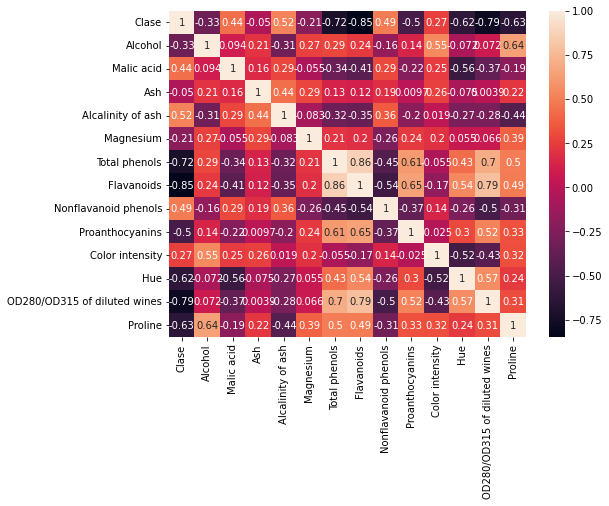

In [ ]:
corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

MODELOS

In [ ]:
X = df.loc[:, df.columns[(df.columns != 'Clase')]]
y = df.loc[:, 'Clase'].values

In [ ]:
X = df.drop(columns=['Clase'])
y = df["Clase"]

In [ ]:
y.value_counts()

2    71
1    59
3    48
Name: Clase, dtype: int64

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3,stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5,stratify=y_val)

#decision tree

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X_train, y_train)
print('Accuracy', tree_clf.score(X_val, y_val))

Accuracy 0.8888888888888888


In [ ]:
param_grid = [{'max_depth':[1,2,3,4,5,6,7,8,9,10]}
]

arbol_clf = DecisionTreeClassifier()

grid_search = GridSearchCV(arbol_clf, param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True)

In [ ]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.614      0.847      0.87166667 0.88733333 0.89566667 0.88766667
 0.87966667 0.88766667 0.89566667 0.89566667] [{'max_depth': 1}, {'max_depth': 2}, {'max_depth': 3}, {'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}, {'max_depth': 7}, {'max_depth': 8}, {'max_depth': 9}, {'max_depth': 10}]


In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train, y_train)
print('Accuracy', tree_clf.score(X_val, y_val))

Accuracy 0.9259259259259259


In [ ]:
validacion_tree=tree_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, validacion_tree))

              precision    recall  f1-score   support

           1       0.89      0.89      0.89         9
           2       0.80      0.80      0.80        10
           3       0.88      0.88      0.88         8

    accuracy                           0.85        27
   macro avg       0.85      0.85      0.85        27
weighted avg       0.85      0.85      0.85        27



Matriz de Confusion

In [ ]:
def plotCMa(cma,labels):
    cma = cma/cma.sum(axis=1).reshape(-1,1)
    f= plt.figure(figsize=(16, 10))
    plt.matshow(cma, fignum=f.number)
    plt.clim(0, 1)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Confusion matrix", fontsize=20)
    plt.xticks(range(len(labels)), [f"{label} (Etiqueta)" for label in labels], fontsize=16)
    plt.yticks(range(len(labels)), [f"{label} (Real)" for label in labels], fontsize=16)
    ax = plt.gca()

    for i in range(cma.shape[0]):
        for j in range(cma.shape[1]):
            value = cma[i][j]
            ax.text(j,i,"{0:.4f}".format(value),ha="center", va="center", color="k", fontsize=16)

    plt.show()

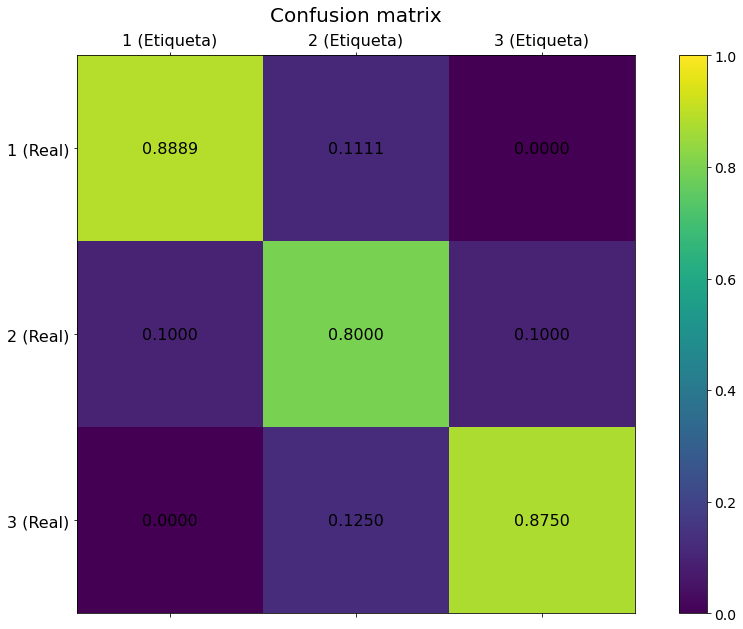

In [ ]:
cm = metrics.confusion_matrix(y_test,validacion_tree)
plotCMa(cm,['1','2','3'])

RANDOM FOREST

In [ ]:
rndf_clf = RandomForestClassifier(n_estimators=150)
rndf_clf.fit(X_train, y_train)
y_pred = rndf_clf.predict(X_val)

rndf_clf.score(X_val, y_val)

1.0

In [ ]:
param_grid = [{'n_estimators':[10,50,100,150,200,250,300,350,400,450,500]}
]

forest_clf = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'n_estimators': [10, 50, 100, 150, 200, 250, 300, 350,
                                           400, 450, 500]}],
             return_train_score=True)

In [ ]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.97566667 0.97566667 0.97566667 0.98366667 0.98366667 0.98366667
 0.98366667 0.97566667 0.98366667 0.98366667 0.98366667] [{'n_estimators': 10}, {'n_estimators': 50}, {'n_estimators': 100}, {'n_estimators': 150}, {'n_estimators': 200}, {'n_estimators': 250}, {'n_estimators': 300}, {'n_estimators': 350}, {'n_estimators': 400}, {'n_estimators': 450}, {'n_estimators': 500}]


In [ ]:
rndf_clf = RandomForestClassifier(n_estimators=150)
rndf_clf.fit(X_train, y_train)
y_pred = rndf_clf.predict(X_val)

#print(y_pred)
#print(y_val.tolist())
rndf_clf.score(X_val, y_val)

1.0

In [ ]:
validacion=rndf_clf.predict(X_test)
print(classification_report(y_test, validacion))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      0.90      0.95        10
           3       0.89      1.00      0.94         8

    accuracy                           0.96        27
   macro avg       0.96      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27



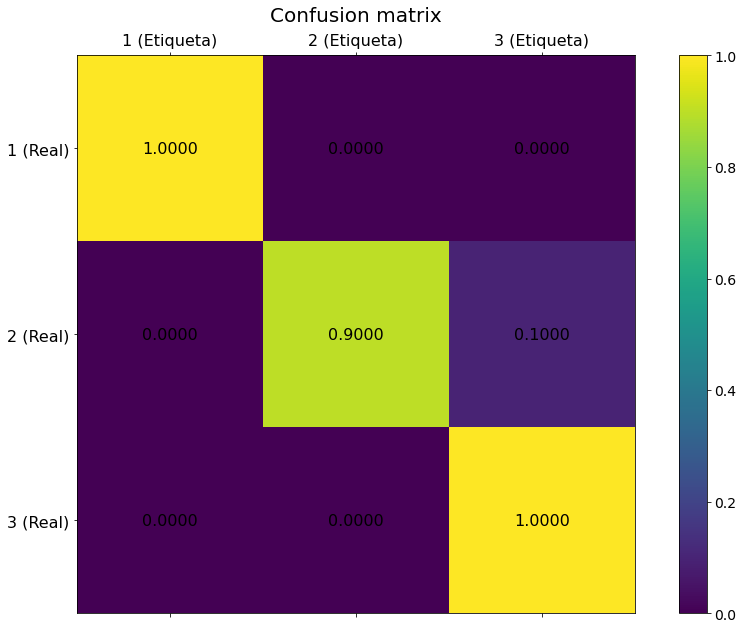

In [ ]:
cm = metrics.confusion_matrix(y_test,validacion)
plotCMa(cm,['1','2','3'])

KNN

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val=scaler.transform(X_val)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train) 
predictions = knn.predict(X_val)
accuracy=knn.score(X_val, y_val)
print('Accuracy:',accuracy)

Accuracy: 0.8888888888888888


In [ ]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [ ]:
cvres = grid.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.95961538 0.95961538 0.96794872 0.95961538 0.97628205 0.95961538
 0.95961538 0.95961538 0.96794872 0.96794872 0.96794872 0.96794872
 0.96794872 0.96794872 0.96794872 0.96794872 0.96794872 0.96794872
 0.96794872 0.96794872 0.96794872 0.95961538 0.96794872 0.95897436
 0.96730769 0.95897436 0.95128205 0.95128205 0.94358974 0.95128205] [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 6}, {'n_neighbors': 7}, {'n_neighbors': 8}, {'n_neighbors': 9}, {'n_neighbors': 10}, {'n_neighbors': 11}, {'n_neighbors': 12}, {'n_neighbors': 13}, {'n_neighbors': 14}, {'n_neighbors': 15}, {'n_neighbors': 16}, {'n_neighbors': 17}, {'n_neighbors': 18}, {'n_neighbors': 19}, {'n_neighbors': 20}, {'n_neighbors': 21}, {'n_neighbors': 22}, {'n_neighbors': 23}, {'n_neighbors': 24}, {'n_neighbors': 25}, {'n_neighbors': 26}, {'n_neighbors': 27}, {'n_neighbors': 28}, {'n_neighbors': 29}, {'n_neighbors': 30}]


In [ ]:
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train, y_train) 
predictions = knn.predict(X_val)
accuracy=knn.score(X_val, y_val)
print('Accuracy:',accuracy)

Accuracy: 1.0


In [ ]:
predictions = knn.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         8

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



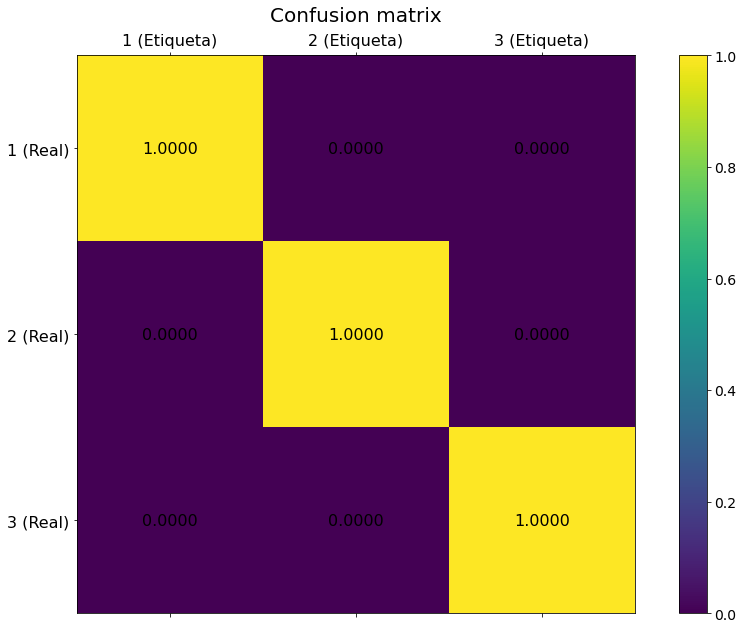

In [ ]:
cm = metrics.confusion_matrix(y_test,predictions)
plotCMa(cm,['1','2','3'])

Regresor logistico

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
log_reg.score(X_val,y_val)

0.9629629629629629

In [ ]:
log_reg = LogisticRegression(penalty='none')
log_reg.fit(X_train, y_train)

LogisticRegression(penalty='none')

In [ ]:
log_reg.score(X_val,y_val)

0.9259259259259259

In [ ]:
predictions_regressor = log_reg.predict(X_test)
print(classification_report(y_test, predictions_regressor))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         8

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



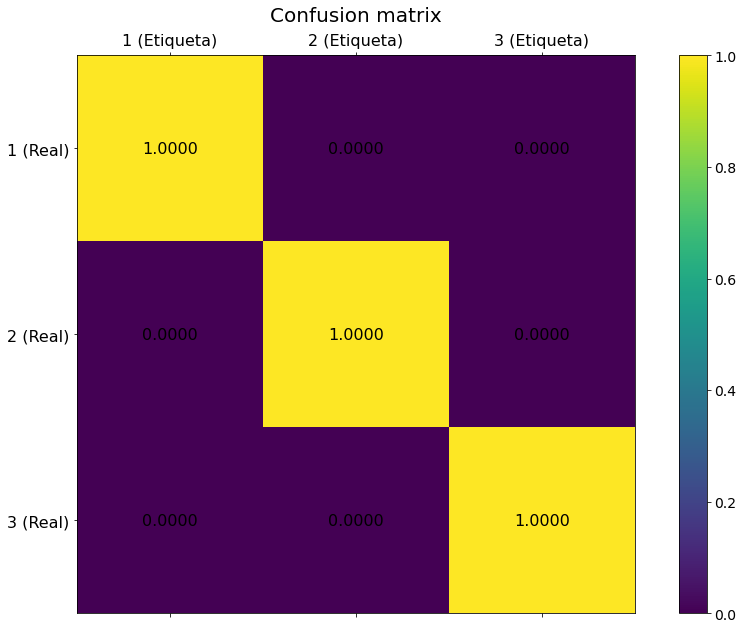

In [ ]:
cm = metrics.confusion_matrix(y_test,predictions_regressor)
plotCMa(cm,['1','2','3'])

In [ ]:
log_reg = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.5)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [ ]:
param_grid = [
    {'C':[1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05,0.025],
    'class_weight':[{0: 0.2, 1: 0.8},{0: 0.17, 1: 0.83},{0: 0.1, 1: 0.9},{0: 0.05, 1: 0.95},{0: 0.01, 1: 0.99},{0: 0.25, 1: 0.75},{0: 0.4, 1: 0.6}],
    'penalty':['none', 'l1', 'l2','elasticnet'],
    'solver':['newton-cg', 'lbfgs', 'liblinear','saga'],
    'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5]}
]

log_reg_clf = LogisticRegression()

from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(log_reg_clf, param_grid,cv=2,
                          return_train_score=True,scoring='f1',verbose=1)

grid_search.fit(X_train, y_train)
## ojo, este codigo se demora aprox 4 hrs, dado q toma todo de todo para optimizar, por ende es RECOMENDABLE QUE SE VAYAN CAMBIANDO O QUITANDO PARAMETROS

Fitting 2 folds for each of 8064 candidates, totalling 16128 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Go

KeyboardInterrupt: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Text(0.5, 0, 'Clase')

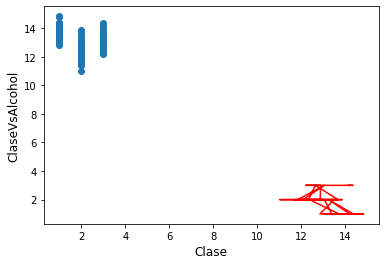

In [ ]:
# Hacer una instancia de regresión lineal
lr = LogisticRegression()
# Entrenamiento del modelo con los datos, almacenando la información aprendida de los datos
# El modelo está aprendiendo la relación entre X e y
lr.fit(X,y)
# Obtener predicciones para valores x originales
# No es así como lo haremos durante el resto del curso
predictions = lr.predict(X)
plt.scatter(df['Clase'], df['Alcohol'])
plt.plot(df['Alcohol'], predictions, color='red')
plt.ylabel('ClaseVsAlcohol', fontsize = 12)
plt.xlabel('Clase', fontsize = 12)

In [ ]:
param_grid = [
    {'C':[1,0.9,0.8,0.7,0.6,0.5],
     'multi_class':['ovr','ovo'],
    'solver':['liblinear'],
    'l1_ratio':[0]}
]

log_reg_clf = LogisticRegression()

from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(log_reg_clf, param_grid,cv=2,
                          return_train_score=True,verbose=1)

grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penal

GridSearchCV(cv=2, estimator=LogisticRegression(),
             param_grid=[{'C': [1, 0.9, 0.8, 0.7, 0.6, 0.5], 'l1_ratio': [0],
                          'multi_class': ['ovr', 'ovo'],
                          'solver': ['liblinear']}],
             return_train_score=True, verbose=1)

In [ ]:
print('Mejores hiperparametros: %s' % grid_search.best_params_)

Mejores hiperparametros: {'C': 0.7, 'l1_ratio': 0, 'multi_class': 'ovr', 'solver': 'liblinear'}


In [ ]:
print('Best Score: %s' % grid_search.best_score_)

Best Score: 0.9838709677419355


In [ ]:
log_reg = LogisticRegression(C= 0.7, l1_ratio= 0, multi_class='ovr', solver= 'liblinear')
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


LogisticRegression(C=0.7, l1_ratio=0, multi_class='ovr', solver='liblinear')

In [ ]:
log_reg.score(X_val,y_val)

0.9629629629629629

In [ ]:
predictions_regressor = log_reg.predict(X_test)
print(classification_report(y_test, predictions_regressor))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         7

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



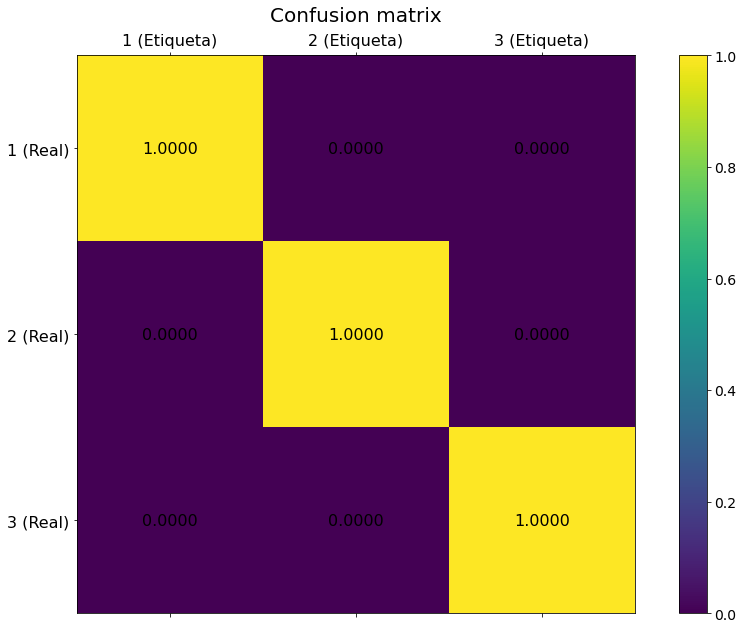

In [ ]:
cm = metrics.confusion_matrix(y_test,predictions_regressor)
plotCMa(cm,['1','2','3'])

In [ ]:
param_grid = [
    {'C':[1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05,0.025],
    'class_weight':[{0: 0.2, 1: 0.8},{0: 0.17, 1: 0.83},{0: 0.1, 1: 0.9},{0: 0.05, 1: 0.95},{0: 0.01, 1: 0.99},{0: 0.25, 1: 0.75},{0: 0.4, 1: 0.6}],
    'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5]}
    'penalty':['none', 'l1', 'l2','elasticnet'],
    'solver':['newton-cg', 'lbfgs', 'liblinear','saga'],
]